In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_csv(file_path, encoding='utf-8'):
    """Load a CSV file with the specified encoding."""
    try:
        data = pd.read_csv(file_path, encoding=encoding)
        return data
    except UnicodeDecodeError:
        raise ValueError(f"Failed to read the file with encoding: {encoding}")

def clean_data(data):
    """Remove rows with missing values and duplicate rows."""
    data = data.dropna()
    data = data.drop_duplicates()
    return data

In [3]:
# File path to the CSV file
file_path = '../data/oil_production_statistics.csv'

# Attempt to load the CSV file with different encodings
encodings = ['utf-8', 'latin1', 'cp1252']
for encoding in encodings:
    try:
        data = load_csv(file_path, encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except ValueError as e:
        print(e)
else:
    print("All attempted encodings failed. Please check the file or try a different encoding.")

Failed to read the file with encoding: utf-8
Successfully read the file with encoding: latin1


In [4]:
# Check if data is loaded
if 'data' in locals():
    # Display the first few rows of the data
    print(data.head())

  country_name     type    product                   flow  year       value
0    Australia  Balance  Crude oil  Industrial Production  2021   18029.678
1      Austria  Balance  Crude oil  Industrial Production  2021     561.852
2      Belgium  Balance  Crude oil  Industrial Production  2021       0.000
3       Canada  Balance  Crude oil  Industrial Production  2021  266630.180
4        Chile  Balance  Crude oil  Industrial Production  2021     340.997


In [5]:
# Clean the data if it is loaded
if 'data' in locals():
    data = clean_data(data)

In [6]:
# Check if data is cleaned
if 'data' in locals():
    # Display the first few rows of the cleaned data
    print(data.head())

  country_name     type    product                   flow  year       value
0    Australia  Balance  Crude oil  Industrial Production  2021   18029.678
1      Austria  Balance  Crude oil  Industrial Production  2021     561.852
2      Belgium  Balance  Crude oil  Industrial Production  2021       0.000
3       Canada  Balance  Crude oil  Industrial Production  2021  266630.180
4        Chile  Balance  Crude oil  Industrial Production  2021     340.997


In [7]:
# Load the Brent Oil Prices data
brent_oil_prices =  pd.read_csv('../data/BrentOilPrices.csv')
# Convert the 'Date' column to datetime, handling inconsistencies
brent_oil_prices['Date'] = pd.to_datetime(brent_oil_prices['Date'], errors='coerce', infer_datetime_format=True)
brent_oil_prices['year'] = brent_oil_prices['Date'].dt.year
# Load the population data

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_12004\3565528335.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  brent_oil_prices['Date'] = pd.to_datetime(brent_oil_prices['Date'], errors='coerce', infer_datetime_format=True)
C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_12004\3565528335.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_oil_prices['Date'] = pd.to_datetime(brent_oil_prices['Date'], errors='coerce', infer_datetime_format=True)


In [8]:
# Merge both DataFrames on the date
merged_data_oil = pd.merge(brent_oil_prices, data, left_on='year', right_on='year', how='inner')

# Drop the redundant 'Year' column after merge
merged_data_oil.drop(columns=['year'], inplace=True)

# Save the merged data to a new CSV file
merged_data_oil.to_csv('merged_data.csv', index=False)

print("Merging completed and saved to 'merged_data_oil.csv'")

Merging completed and saved to 'merged_data_oil.csv'


In [9]:
merged_data_oil

,Date,Price,country_name,type,product,flow,value
0,2021-01-04,50.37,Australia,Balance,Crude oil,Industrial Production,18029.678
1,2021-01-04,50.37,Austria,Balance,Crude oil,Industrial Production,561.852
2,2021-01-04,50.37,Belgium,Balance,Crude oil,Industrial Production,0.000
3,2021-01-04,50.37,Canada,Balance,Crude oil,Industrial Production,266630.180
4,2021-01-04,50.37,Chile,Balance,Crude oil,Industrial Production,340.997
...,...,...,...,...,...,...,...
380903,2022-11-14,93.59,Sweden,Balance,Residual fuel oil,Consumption Pattern,464.630
380904,2022-11-14,93.59,Switzerland,Balance,Residual fuel oil,Consumption Pattern,50.997
380905,2022-11-14,93.59,Türkiye,Balance,Residual fuel oil,Consumption Pattern,1237.216
380906,2022-11-14,93.59,United Kingdom,Balance,Residual fuel oil,Consumption Pattern,239.000


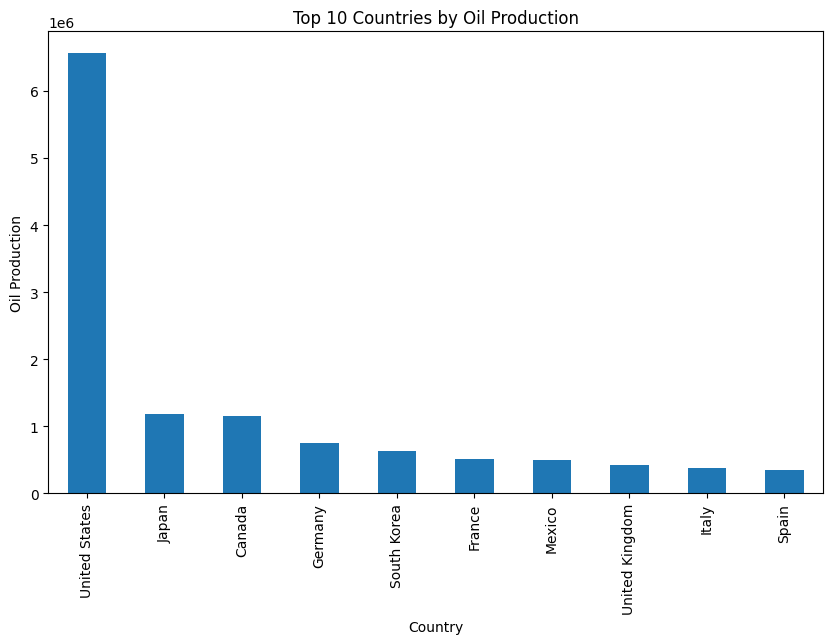

In [10]:
# EDA - Example 1: Bar plot of oil production by country
country_production = data.groupby('country_name')['value'].sum().sort_values(ascending=False)[:10]
country_production.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Oil Production')
plt.title('Top 10 Countries by Oil Production')
plt.show()

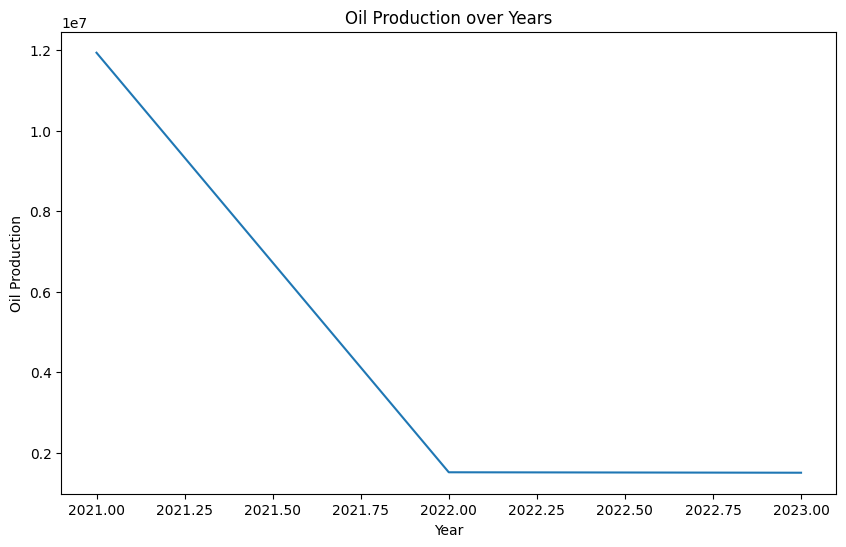

In [11]:
# EDA - Example 2: Line plot of oil production over years
year_production = data.groupby('year')['value'].sum()
year_production.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Oil Production')
plt.title('Oil Production over Years')
plt.show()

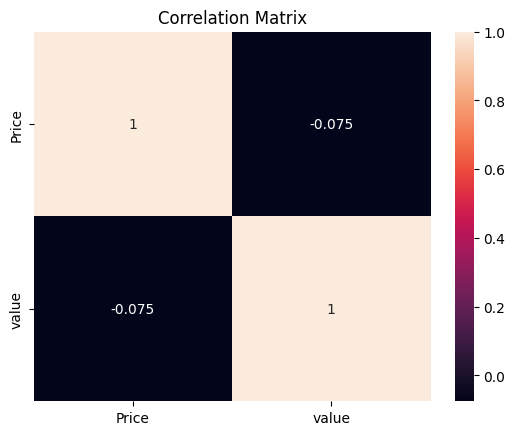

In [12]:
# Correlation Analysis
# Select only numeric columns
numeric_data = merged_data_oil.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()
# Correlation Matrix
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

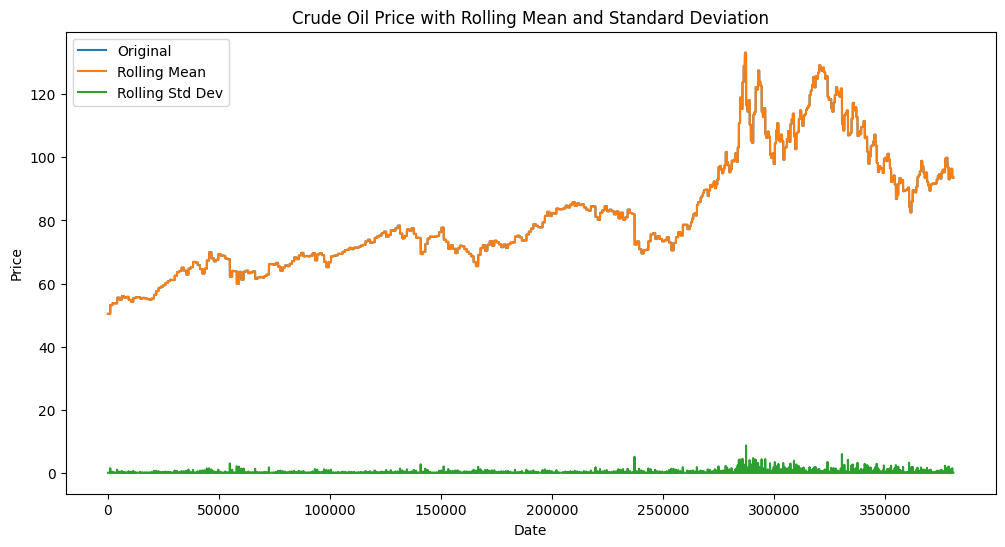

In [13]:
# Rolling Mean and Standard Deviation
plt.figure(figsize=(12, 6))
plt.plot(merged_data_oil['Price'], label='Original')
plt.plot(merged_data_oil['Price'].rolling(window=12).mean(), label='Rolling Mean')
plt.plot(merged_data_oil['Price'].rolling(window=12).std(), label='Rolling Std Dev')
plt.legend()
plt.title('Crude Oil Price with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()